# Beam Profile From a Transducer Array 

## Basics
A transducer array consists of many individual elements, e.g., 32, 64, 128, each with its own transmit and receive electronics. By delaying the pulses trasmitted from each element, the beam can be steered in different directions and focused to different depths without Physically moving or tilting the trasnducer array. 

The idea is illustrated below. If all trasnducer elements transmit at the same time, i.e., no delay, the waves emitted from the elements are in phase and a nearly plane wave will be transmitted normally out from the trasnducer surface. This is shown in the left illustration.
The right illustration shows the same wave if the waves from the individual elements are transmitted with a constant delay, i.e., the pulse from the lower element is trasnmitted at time $t=0$, the element above this at $t=\tau$,  the element above this again at $t=2\tau$, etc.

<div>
<img src="../figs/fig-array-pulses-0.svg" alt="Array, all elements in phase." width="450px" />
<img src="../figs/fig-array-pulses-1.svg" alt="Array, Constant delay between elements." width="450px" />
</div>
The resulting wavefronts is illustrated in the figure below. The wavefield from each transducer element is shown as a spherical wave spreading out from the centre of the element. This is a good approximation when the element is much smaller than the wavelength. The left illustration shows wavefronts if all elements trasnmit in phase, illustrating how the wavefronts add up to a near plane wave propagating normally from the trasnducer surface. 
The right illustration shows the when the pulses from the elements are transmitted at constant delays, as in the figure above. The wavefronts will still add up to a near plane wave, but this will now propagate at an angle to the normal from the transducer surface
<div>
<img src="../figs/fig-array-wavefronts-0.svg" alt="Array, all elements in phase." width="650px" />
<img src="../figs/fig-array-wavefronts-1.svg" alt="Array, Constant delay between elements." width="650px" />
</div>

# Directivity from an Array of Points
The array considered here is the simplest possible, consisting of $N$ point sources spaced with distance $d$, denoted the *pitch*.
The total width of the entire array is $D=Nd$.
This is ilustrated below, showing a frontal view of the trasnducer array.
<div>
<img src="../figs/fig-array-circles.svg" alt="Array of points." width="700px" />
</div>


The pressure field from the entire array is found by summing the fields $p_n(\vec{r_n},t)$ over all elements $n$. If the delay between the elements is constant, $\tau_n = (n-n_c) \tau$, this gives
\begin{align}
    p(\vec r,t) = \sum_{n=1}^N  p_n(\vec r,t) = A\frac{wh}{r} e^{j(\omega t - kr)} \sum_{n=1}^N e^{j( n \omega \tau +n k d \sin \theta )}\:.
\end{align}
The sum is recognised as a geometrical series and can be evalusted straightforward, using Euler's formula to convert the complex exponential to sines, see details in the lecture notes. The result is
\begin{align}
    p(\vec r,t) &= A\frac{wh}{r} e^{j(\omega t - kr)}  
    \frac{\sin \left( N \pi \frac{d}{\lambda} (\sin \theta -\sin \theta_s ) \right)} {N \sin \left(\pi \frac{d}{\lambda} (\sin \theta -\sin \theta_s ) \right)} \:,
\end{align}
where the *steering angle* $\theta_s$ is introduced to make the interpretation easier. $\theta_s$ is a function of the element delay $\tau$, $\sin \theta_s = \frac{c\tau}{d}$. The steering angle $\theta_s$ is the angle the where denominator goes to zero and the expression has a maximum. 
A practical array has many elements, $N \gg 1$, hence, the equation above is the ratio between a fast and a slowly varying sine-function. The fast varying numerator defines the sharpness of the main lobe and the structure of the sidelobes, while the slowly varying denominator gives the overall amplitude level. A strong maximum outside the main lobe will occur if the denominator is equal to zero for angles different from $\theta_s$, i.e., when $\sin \theta - \sin \theta_s = 0$ and $\theta \ne \theta_s$. This is called a *grating lobe* and should be avoided for any steering angle.

The last factor gives the directivity $D(\theta)$ or radiation patttern of the array. Such radiatin patterns are often plotted in a polar diagram.
\begin{align}
    D(\theta) &= \frac{\sin \left( N \pi \frac{d}{\lambda} (\sin \theta -\sin \theta_s ) \right)} {N \sin \left(\pi \frac{d}{\lambda} (\sin \theta -\sin \theta_s ) \right)} \:,
\end{align}


### Results as Interactive Plots
The radation pattern from an array of pont sources has been implemented in a Python program and can be run interactively using the widgets below.


The left graph shows the radiation pattern from the array in dB. The result is normalised to the maximum value. This graph illustrates how the main lobe is centered around the steering angle, with side lobes surrounding the main lobe, and how the beam width changes with array size. If the spacing $d$ between the elements larger than $\tfrac12 \lambda$, grating lobes may emerge outside the main lobe. 

The right  graph shows the delays $\tau_n$ calculated to obtain the requested steering angle $\theta_s$. 

Run the code to start the interactive plots, and change the values to see how the beam pattern changes.


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


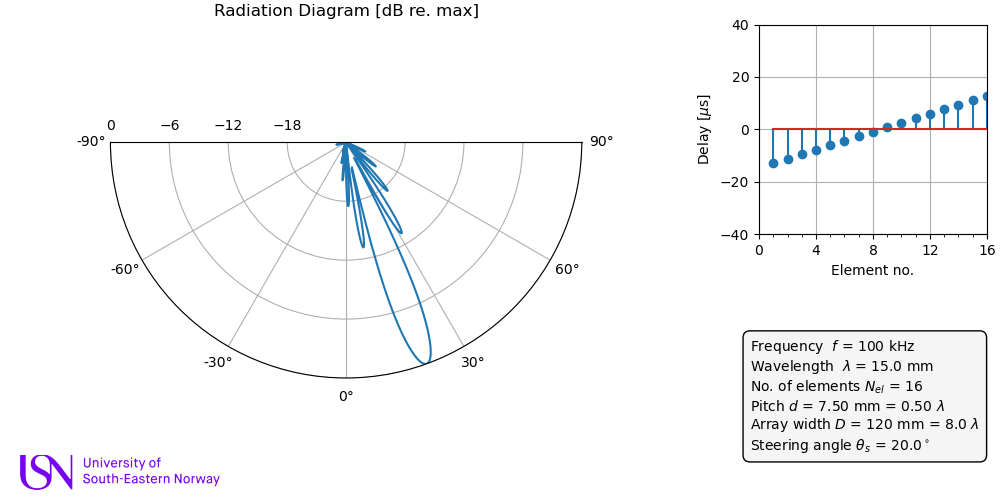

In [63]:
%matplotlib ipympl   
%load_ext autoreload
%autoreload 2
    
import point_array_directivity
import ipywidgets

array = point_array_directivity.Array(create_widgets=True)
display(array.widget.layout)

res = ipywidgets.interactive(array.interact, 
                             n_elements = array.widget.widget['n_elements'],
                             frequency = array.widget.widget['frequency'],
                             pitch = array.widget.widget['pitch'],
                             angle_s = array.widget.widget['steering_angle'])